# Classification Exercises

### 1. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables. 
    
   Would you recommend rescaling the data based on these statistics?

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_iris = sns.load_dataset('iris')

In [ ]:
type(df_iris)

In [ ]:
#print the first 3 rows
df_iris.head(3) 

In [ ]:
#print the number of rows and columns (shape)
df_iris.shape

In [ ]:
#print the column names
df_iris.columns

In [ ]:
#print the data type of each column
df_iris.dtypes

In [ ]:
#print the summary statistics for each of the numeric variables.
df_iris.describe()

### Would you recommend rescaling the data based on these statistics?

### -Yes

### 2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [ ]:
 df_excel = pd.read_excel('Table1_CustDetails.xlsx', sheet_name='Table1_CustDetails')
    

In [ ]:
 df_excel.head()

In [ ]:
df_excel.shape

In [ ]:
df_excel_sample = df_excel.head(100)

In [ ]:
df_excel_sample.shape

In [ ]:
df_excel_sample.columns[0:5]

In [ ]:
df_excel_sample.dtypes

In [ ]:
numerics = df_excel_sample.select_dtypes(include=['float64', 'int64'])

In [ ]:
numerics.max() - numerics.min()

In [ ]:
df_cols_object_type_bool = df_excel_sample.dtypes == 'object'
df_cols_object_type_bool

In [ ]:
object_type_cols = df_excel_sample.dtypes[df_cols_object_type_bool]
object_type_cols

In [ ]:
range_monthly_charges = df_excel.monthly_charges.max() - df_excel.monthly_charges.min()
range_monthly_charges

In [ ]:
range_total_charges = df_excel.total_charges.max() - df_excel.total_charges.min()
range_total_charges

In [ ]:
range_avg_monthly_charges = df_excel.avg_monthly_charge.max() - df_excel.avg_monthly_charge.min()
range_avg_monthly_charges

In [ ]:
range_tenure = df_excel.tenure.max() - df_excel.tenure.min()
range_tenure

In [ ]:
url = "https://gist.githubusercontent.com/ryanorsinger/3fce5a65b5fb8ab728af5192c7de857e/raw/a0422b7b73749842611742a1064e99088a47917d/clean_telco.csv"
df_excel = pd.read_csv(url, index_col="id")

# 3. Read the data from this google sheet into a dataframe, df_google

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [ ]:
sheet_url = "https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit?usp=sharing"

csv_export_url = sheet_url.replace('/edit?usp=sharing', '/export?format=csv')

df_google = pd.read_csv(csv_export_url)
df_google.head(3)

In [ ]:
df_google.shape

In [ ]:
df_google.columns.tolist()

In [ ]:
df_google.dtypes

In [ ]:
df_google.describe().T

In [ ]:
#print the unique values for each of your categorical variables

for column in df_google.select_dtypes(include = 'object').columns:
        print(f"Values in the {column} column:")
        print(df_google[column].value_counts())
        print('----')
        print ()

In [ ]:
df_google.Survived.unique()

In [ ]:
df_google.Pclass.unique()

In [ ]:
df_google.Sex.unique()

In [ ]:
df_google.SibSp.unique()

In [ ]:
df_google.Parch.unique()

In [ ]:
df_google.Cabin.unique()

In [ ]:
df_google.Embarked.unique()

In [ ]:
def get_db_url(host, user, password, database):
        
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    
    return url

def get_titanic_data():
    from env import host, user, password

    database = 'titanic_db'

    query = "SELECT * FROM passengers;"

    df = pd.read_sql(query, get_db_url(host,user, password, 'titanic_db'))

    return df

In [ ]:
df = get_titanic_data()

In [ ]:
df

In [ ]:
def get_iris_data():
    from env import host, user, password
       
    database = 'iris_db'

    query = "SELECT * FROM species;"

    df = pd.read_sql(query, get_db_url(host,user, password, 'iris_db'))

    return df

In [ ]:
df_iris = get_iris_data()
df_iris

# Data Preparation Exercises

### 1. Use the function defined in acquire.py to load the iris data.

In [ ]:
import pandas as pd
import acquire 

df_iris = acquire.get_iris_data()
df_iris

### 2. Drop the species_id and measurement_id columns.

In [ ]:
df_iris = df_iris.drop(columns = ['species_id', 'measurement_id', 'Unnamed: 0'])

In [ ]:
df_iris

### 3. Rename the species_name column to just species.

In [ ]:
df_iris = df_iris.rename(columns={"species_name": "species"})

In [ ]:
df_iris

### 4. Create dummy variables of the species name.

In [ ]:
df_dummy = pd.get_dummies(df_iris[['species']])
df_iris = pd.concat([df_iris, df_dummy], axis = 1)
df_iris.head()


### 5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
def prep_iris(df):
    
    import pandas as pd
    import acquire 

    df_iris = acquire.get_iris_data()
    
    df_iris = df_iris.drop(columns = ['species_id', 'measurement_id', 'Unnamed: 0'])
    
    df_iris = df_iris.rename(columns={"species_name": "species"})
    
    df_dummy = pd.get_dummies(df_iris[['species']])
    
    return pd.concat([df_iris, df_dummy], axis = 1)
    

In [ ]:
import prepare

In [ ]:
prepare.prep_iris()

# Imputing Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

import acquire

In [ ]:
df = acquire.get_titanic_data()

In [ ]:
# rows & columns
df.shape

In [ ]:
# first n rows
df.head()

In [ ]:
def split_titanic_data(df):
    """
    splits the data in train validate and test 
    """
    train, test = train_test_split(df, test_size = 0.2, random_state = 123, stratify = df.survived)
    
    #Splitting again but this time passing in train to split up
    train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train.survived)
    
    return train, validate, test

In [ ]:
train, validate, test = split_titanic_data(df)

In [ ]:
# Define the thing:

imputer = SimpleImputer(strategy ='most_frequent')
imputer

In [ ]:
# fit the thing on train, not validate and test, because that would be training your model on future data

imputer = imputer.fit(train[['embark_town']])
imputer

In [ ]:
# Use the thing (i.e transform)

train[['embark_town']] = imputer.transform(train[['embark_town']])

validate[['embark_town']] = imputer.transform(validate[['embark_town']])

test[['embark_town']] = imputer.transform(test[['embark_town']])

# Exploratory Analysis

### Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

Acquire, prepare & split your data.

 

In [16]:
import pandas as pd
import acquire 
import prepare
import explore

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
df = prepare.prep_iris()

In [3]:
df

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...,...
145,virginica,6.7,3.0,5.2,2.3,0,0,1
146,virginica,6.3,2.5,5.0,1.9,0,0,1
147,virginica,6.5,3.0,5.2,2.0,0,0,1
148,virginica,6.2,3.4,5.4,2.3,0,0,1


In [7]:
def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on survived.
    return train, validate, test DataFrames.
    '''

    # 20% test, 80% train_validate
    # then of the 80% train_validate: 30% validate, 70% train. 

    train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.species)
    train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.species)

    return train, validate, test

In [8]:
train, validate, test = split_data(df)

In [9]:
# Validate my split.

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (84, 8)
validate -> (36, 8)
test -> (30, 8)


In [37]:
train

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
79,versicolor,5.7,2.6,3.5,1.0,0,1,0
36,setosa,5.5,3.5,1.3,0.2,1,0,0
133,virginica,6.3,2.8,5.1,1.5,0,0,1
95,versicolor,5.7,3.0,4.2,1.2,0,1,0
18,setosa,5.7,3.8,1.7,0.3,1,0,0
...,...,...,...,...,...,...,...,...
11,setosa,4.8,3.4,1.6,0.2,1,0,0
85,versicolor,6.0,3.4,4.5,1.6,0,1,0
55,versicolor,5.7,2.8,4.5,1.3,0,1,0
44,setosa,5.1,3.8,1.9,0.4,1,0,0


###  2. Univariate Stats

   - For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive   statistics (using .describe()).

   - For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

   - Document takeaways & any actions.

In [40]:
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


In [56]:
# Create a list of categorical variables and one of quantitative variables in order to uses exploratory functions
cat_vars = ['species']
quant_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

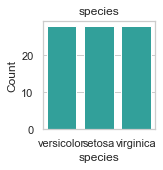

               species  Count  Percent
setosa      versicolor     28    33.33
versicolor      setosa     28    33.33
virginica    virginica     28    33.33
_________________________________________________________________


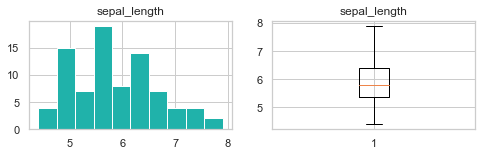

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64


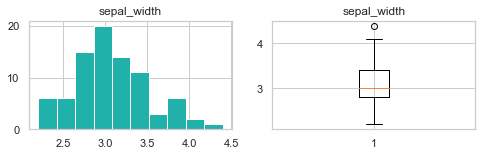

count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64


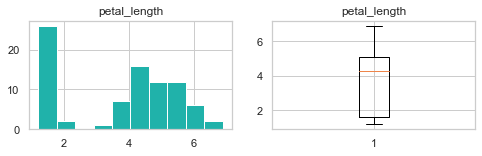

count    84.000000
mean      3.771429
std       1.734940
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64


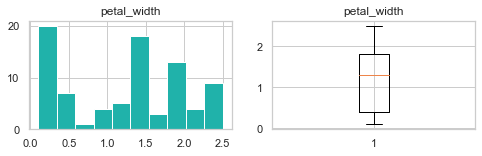

count    84.000000
mean      1.203571
std       0.752577
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


In [57]:
explore.explore_univariate(train, cat_vars, quant_vars)

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Datas

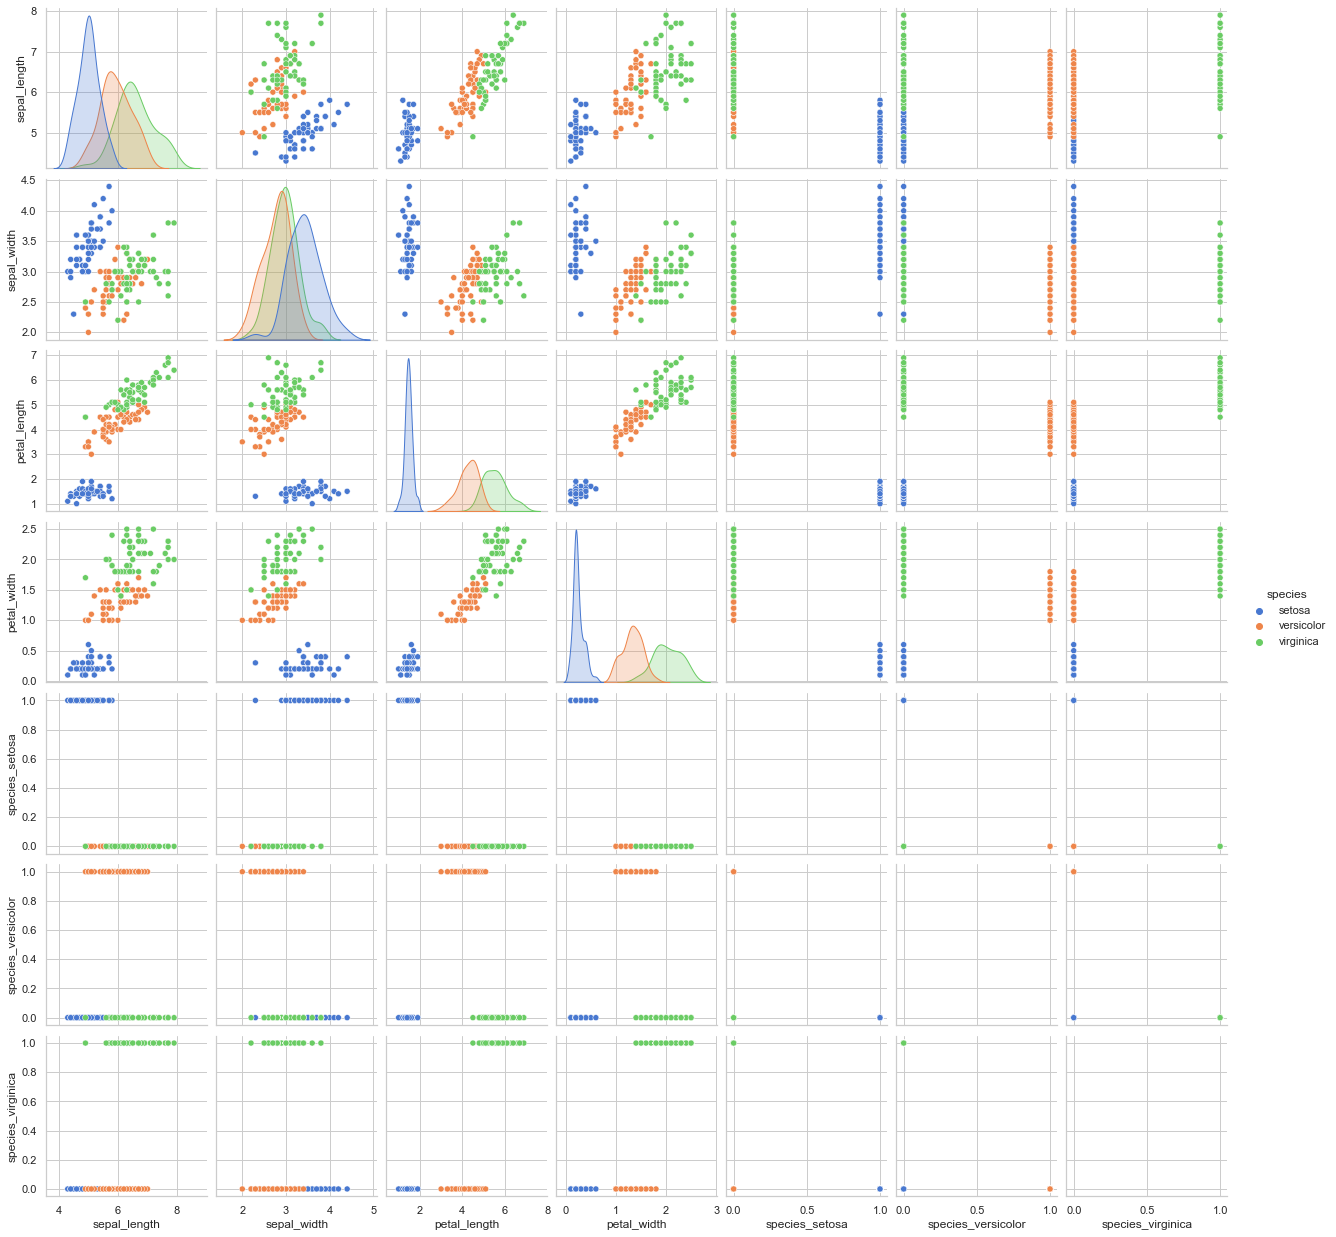

In [61]:
sns.pairplot(df, hue = 'species')

### Takeaways & Actions to Take:

- Sepal length range is between 4.4 and 7.9 with a mean of 5.87.

- Sepal width range is between 2.2 and 4.4 with a mean of 3.07.

- Petal length range is between 1.2 and 6.9 with a mean of 3.77.

- Petal width range is between 0.1 and 2.5 with a mean of 1.2.

- On average, petals are shorter and narrower than sepals.

- Actions to take: Look into how the sepal and petal lengths and widths are related and how they compare among species.  

### 3. Bivariate Stats

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

- For each measurement type, compute the descriptive statistics for each species.

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

- Document takeaways & any actions.

species_versicolor 
_____________________

        chi2   p-value  degrees of freedom
0  18.810268  0.000014                   1

observed:
 species_setosa       0   1  All
species_versicolor             
0                   28  28   56
1                   28   0   28
All                 56  28   84

expected:
            0          1
0  37.333333  18.666667
1  18.666667   9.333333


/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


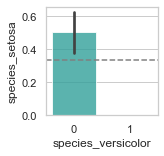


_____________________

species_virginica 
_____________________

        chi2   p-value  degrees of freedom
0  18.810268  0.000014                   1

observed:
 species_setosa      0   1  All
species_virginica             
0                  28  28   56
1                  28   0   28
All                56  28   84

expected:
            0          1
0  37.333333  18.666667
1  18.666667   9.333333


/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


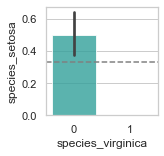


_____________________

sepal_length 
____________________



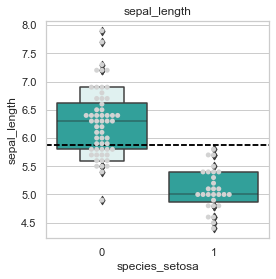

                count      mean       std  min    25%  50%    75%  max
species_setosa                                                        
0                56.0  6.260714  0.602624  4.9  5.800  6.3  6.625  7.9
1                28.0  5.089286  0.360390  4.4  4.875  5.0  5.400  5.8 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1511.5, pvalue=4.917738517892763e-12)

____________________

sepal_width 
____________________



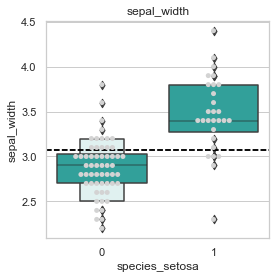

                count      mean       std  min    25%  50%    75%  max
species_setosa                                                        
0                56.0  2.878571  0.309083  2.2  2.700  2.9  3.025  3.8
1                28.0  3.467857  0.427788  2.3  3.275  3.4  3.800  4.4 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=187.0, pvalue=1.3354452213646879e-08)

____________________

petal_length 
____________________



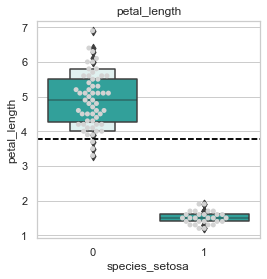

                count      mean       std  min    25%  50%  75%  max
species_setosa                                                      
0                56.0  4.903571  0.781366  3.3  4.275  4.9  5.5  6.9
1                28.0  1.507143  0.184448  1.2  1.400  1.5  1.6  1.9 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1568.0, pvalue=9.977154348539392e-14)

____________________

petal_width 
____________________



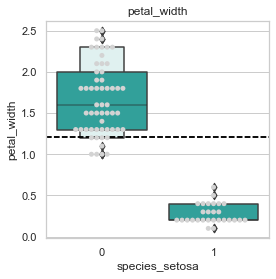

                count      mean       std  min  25%  50%  75%  max
species_setosa                                                    
0                56.0  1.667857  0.434891  1.0  1.3  1.6  2.0  2.5
1                28.0  0.275000  0.120570  0.1  0.2  0.2  0.4  0.6 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1568.0, pvalue=8.123961949952858e-14)

____________________



In [53]:
cat_vars = ['species_versicolor', 'species_virginica']
explore.explore_bivariate(train, 'species_setosa', cat_vars, quant_vars)

species_setosa 
_____________________

        chi2   p-value  degrees of freedom
0  18.810268  0.000014                   1

observed:
 species_versicolor   0   1  All
species_setosa                 
0                   28  28   56
1                   28   0   28
All                 56  28   84

expected:
            0          1
0  37.333333  18.666667
1  18.666667   9.333333


/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


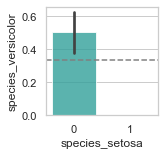


_____________________

species_virginica 
_____________________

        chi2   p-value  degrees of freedom
0  18.810268  0.000014                   1

observed:
 species_versicolor   0   1  All
species_virginica              
0                   28  28   56
1                   28   0   28
All                 56  28   84

expected:
            0          1
0  37.333333  18.666667
1  18.666667   9.333333


/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


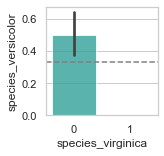


_____________________

sepal_length 
____________________



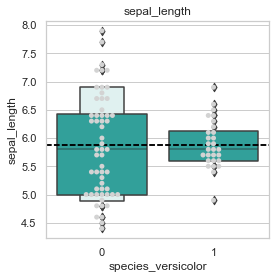

                    count      mean       std  min  25%  50%    75%  max
species_versicolor                                                      
0                    56.0  5.857143  0.896226  4.4  5.0  5.8  6.425  7.9
1                    28.0  5.896429  0.425556  4.9  5.6  5.8  6.125  6.9 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=732.0, pvalue=0.6245929694453309)

____________________

sepal_width 
____________________



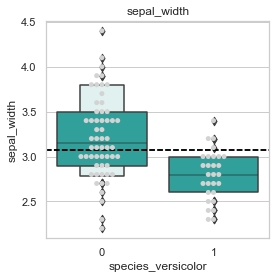

                    count      mean       std  min  25%   50%  75%  max
species_versicolor                                                     
0                    56.0  3.214286  0.453042  2.2  2.9  3.15  3.5  4.4
1                    28.0  2.796429  0.280848  2.3  2.6  2.80  3.0  3.4 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1226.5, pvalue=2.554781908375443e-05)

____________________

petal_length 
____________________



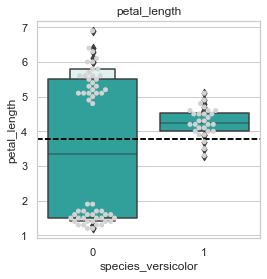

                    count      mean       std  min  25%   50%    75%  max
species_versicolor                                                       
0                    56.0  3.521429  2.066153  1.2  1.5  3.35  5.500  6.9
1                    28.0  4.271429  0.409930  3.3  4.0  4.25  4.525  5.1 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=776.5, pvalue=0.9469943086791007)

____________________

petal_width 
____________________



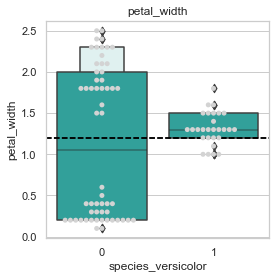

                    count      mean       std  min  25%   50%  75%  max
species_versicolor                                                     
0                    56.0  1.148214  0.908744  0.1  0.2  1.05  2.0  2.5
1                    28.0  1.314286  0.199470  1.0  1.2  1.30  1.5  1.8 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=767.0, pvalue=0.8750261808643868)

____________________



In [54]:
cat_vars = ['species_setosa', 'species_virginica']
explore.explore_bivariate(train, 'species_versicolor', cat_vars, quant_vars)

species_versicolor 
_____________________

        chi2   p-value  degrees of freedom
0  18.810268  0.000014                   1

observed:
 species_virginica    0   1  All
species_versicolor             
0                   28  28   56
1                   28   0   28
All                 56  28   84

expected:
            0          1
0  37.333333  18.666667
1  18.666667   9.333333


/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


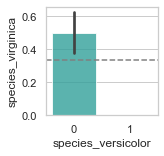


_____________________

species_setosa 
_____________________

        chi2   p-value  degrees of freedom
0  18.810268  0.000014                   1

observed:
 species_virginica   0   1  All
species_setosa                
0                  28  28   56
1                  28   0   28
All                56  28   84

expected:
            0          1
0  37.333333  18.666667
1  18.666667   9.333333


/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


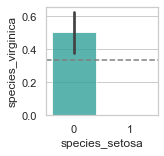


_____________________

sepal_length 
____________________



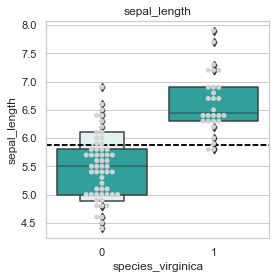

                   count      mean       std  min  25%   50%  75%  max
species_virginica                                                     
0                   56.0  5.492857  0.564352  4.4  5.0  5.50  5.8  6.9
1                   28.0  6.625000  0.532378  5.8  6.3  6.45  6.9  7.9 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=108.5, pvalue=1.41909909540468e-10)

____________________

sepal_width 
____________________



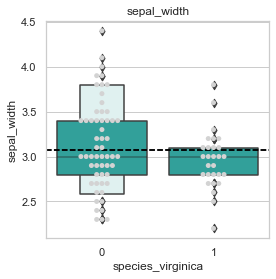

                   count      mean       std  min  25%  50%  75%  max
species_virginica                                                    
0                   56.0  3.132143  0.493266  2.3  2.8  3.0  3.4  4.4
1                   28.0  2.960714  0.318956  2.2  2.8  3.0  3.1  3.8 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=938.5, pvalue=0.14243061976857382)

____________________

petal_length 
____________________



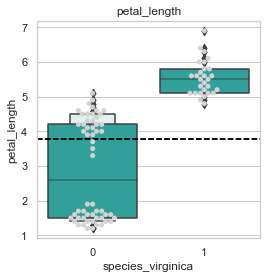

                   count      mean       std  min  25%  50%    75%  max
species_virginica                                                      
0                   56.0  2.889286  1.429772  1.2  1.5  2.6  4.225  5.1
1                   28.0  5.535714  0.496815  4.8  5.1  5.5  5.800  6.9 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=7.5, pvalue=1.706615327459371e-13)

____________________

petal_width 
____________________



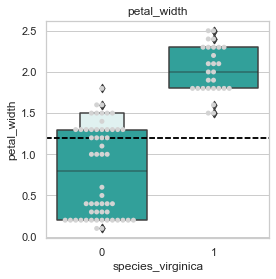

                   count      mean       std  min  25%  50%  75%  max
species_virginica                                                    
0                   56.0  0.794643  0.549188  0.1  0.2  0.8  1.3  1.8
1                   28.0  2.021429  0.293582  1.5  1.8  2.0  2.3  2.5 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=17.0, pvalue=2.7469459984658354e-13)

____________________



In [55]:
cat_vars = ['species_versicolor', 'species_setosa']
explore.explore_bivariate(train, 'species_virginica', cat_vars, quant_vars)

### Takeaways & Actions to Take:
- P values are less than zero for comparison amongst species so they are not independent of each other


### 4. Multivariate Stats

 - Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

 - Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

- Document takeaways and any actions.

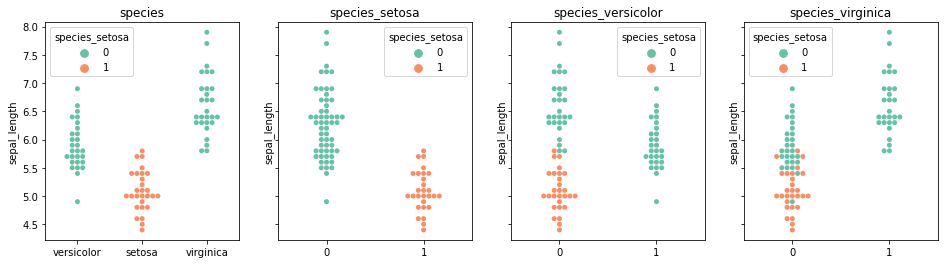

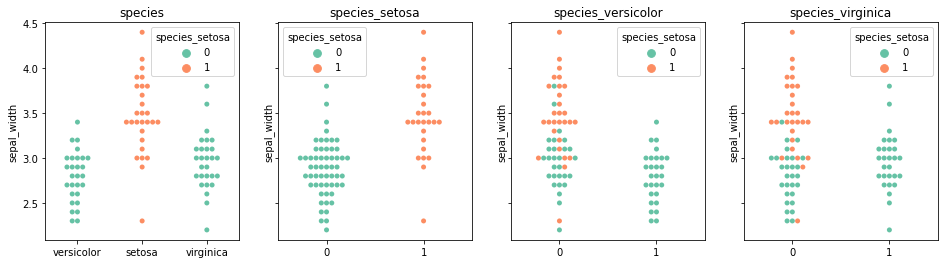

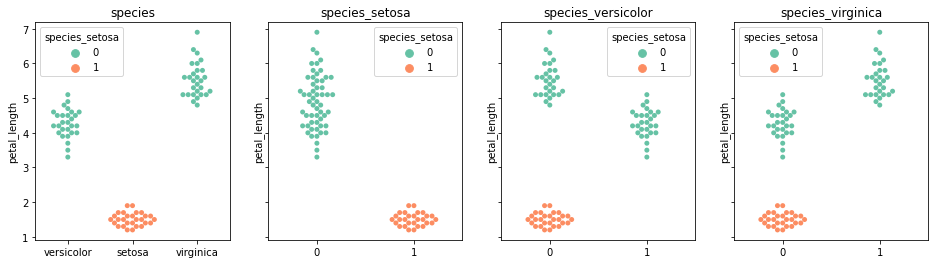

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


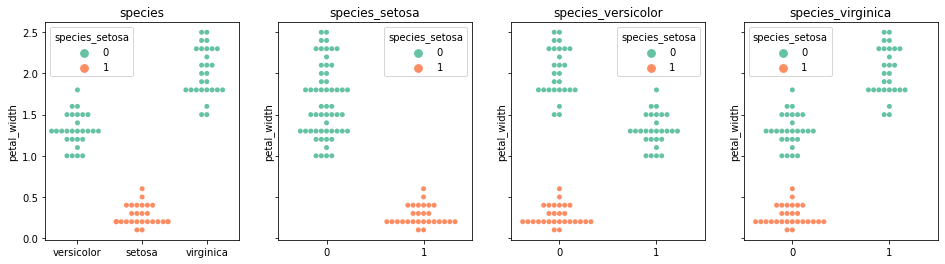

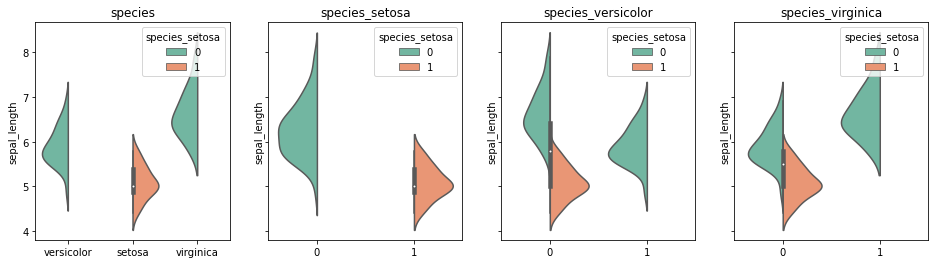

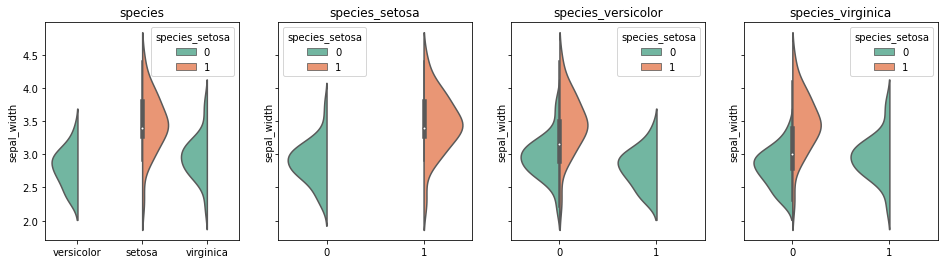

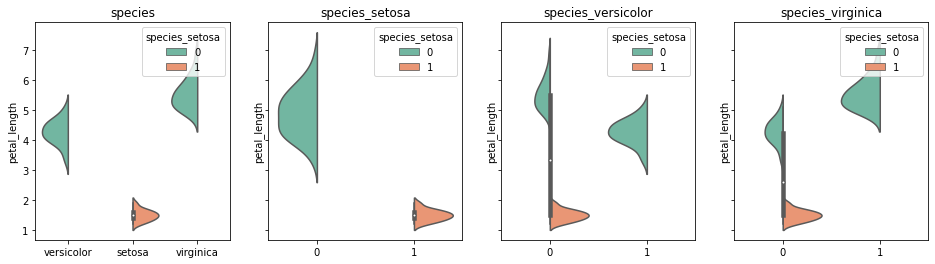

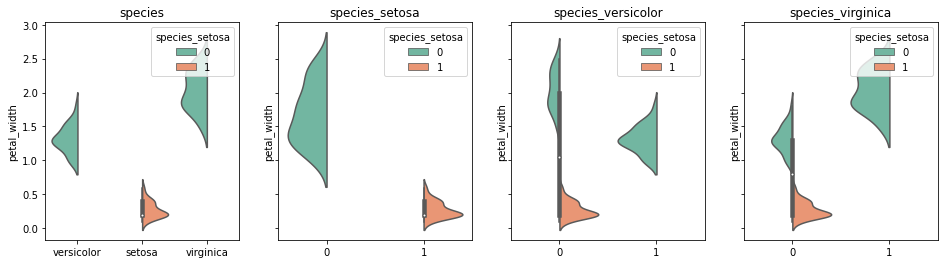

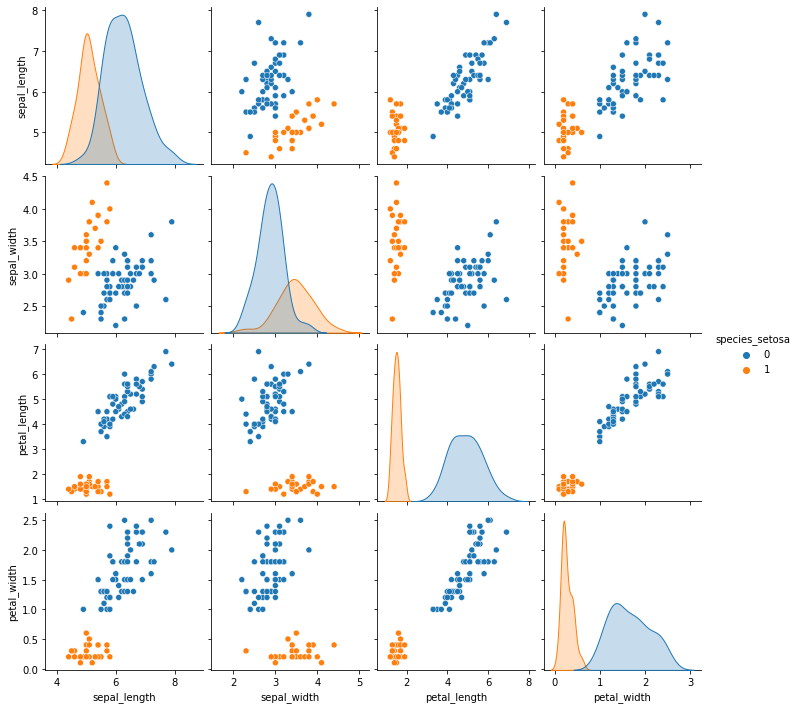

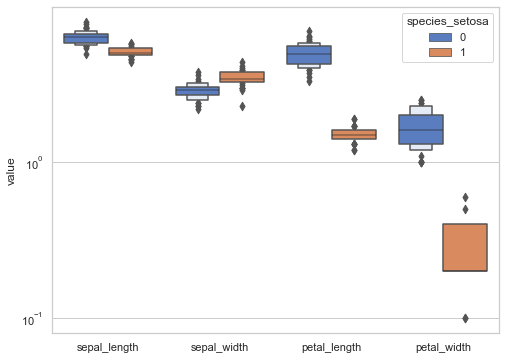

In [47]:
target = 'species_setosa'

explore.explore_multivariate(train, target, cat_vars, quant_vars)

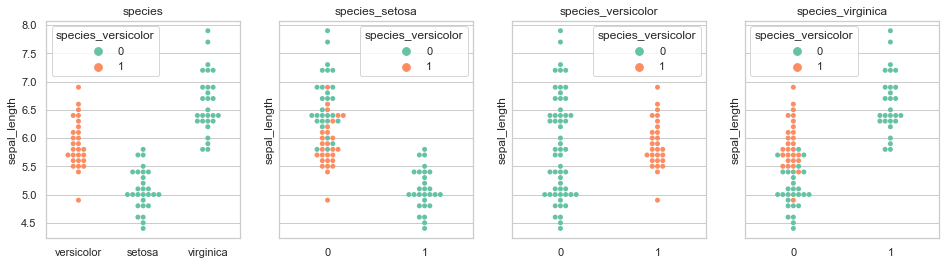

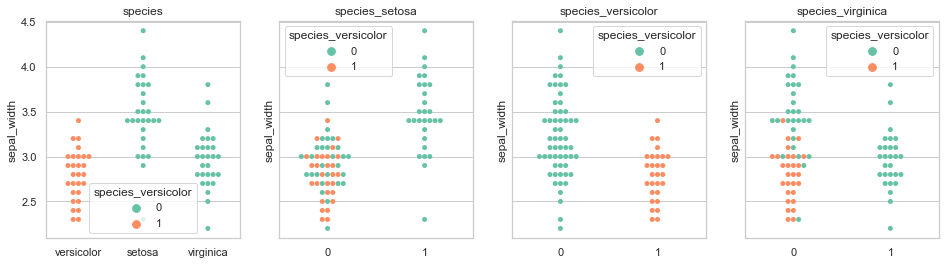

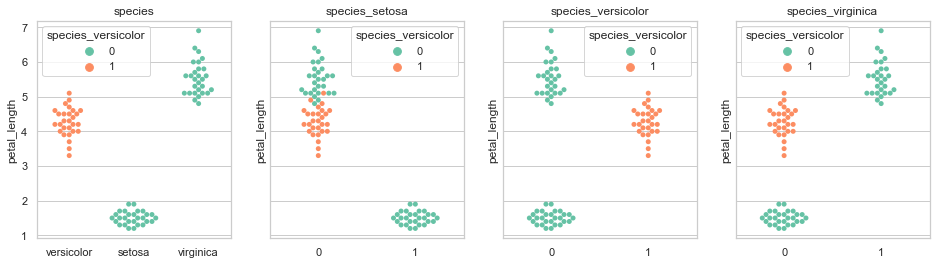

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


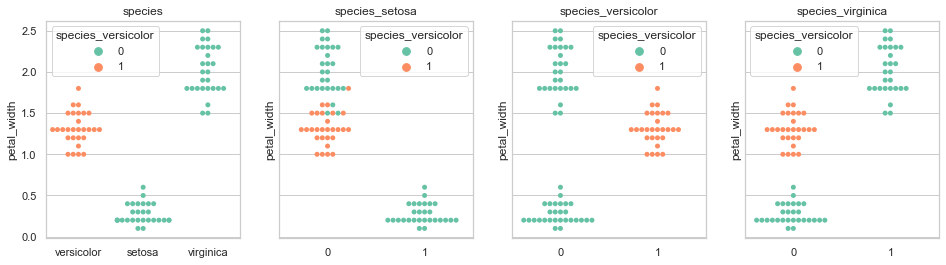

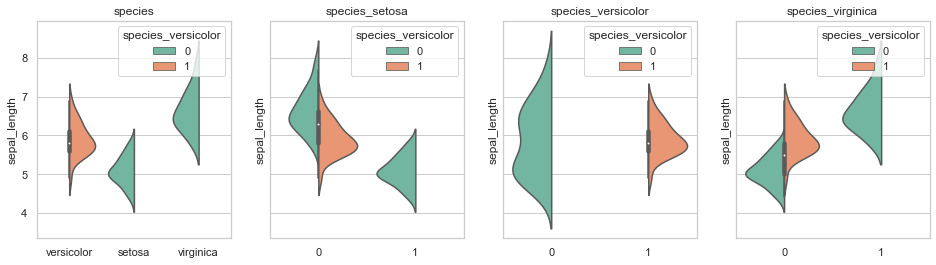

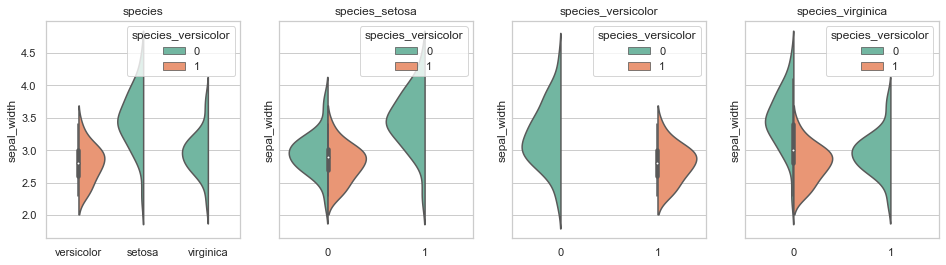

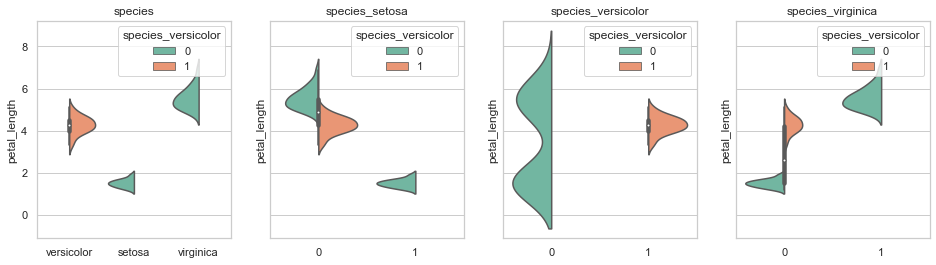

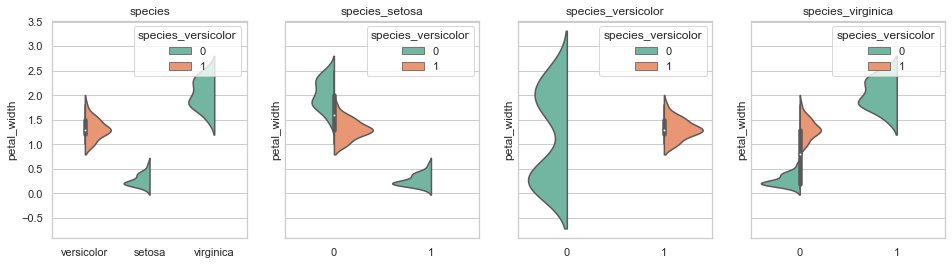

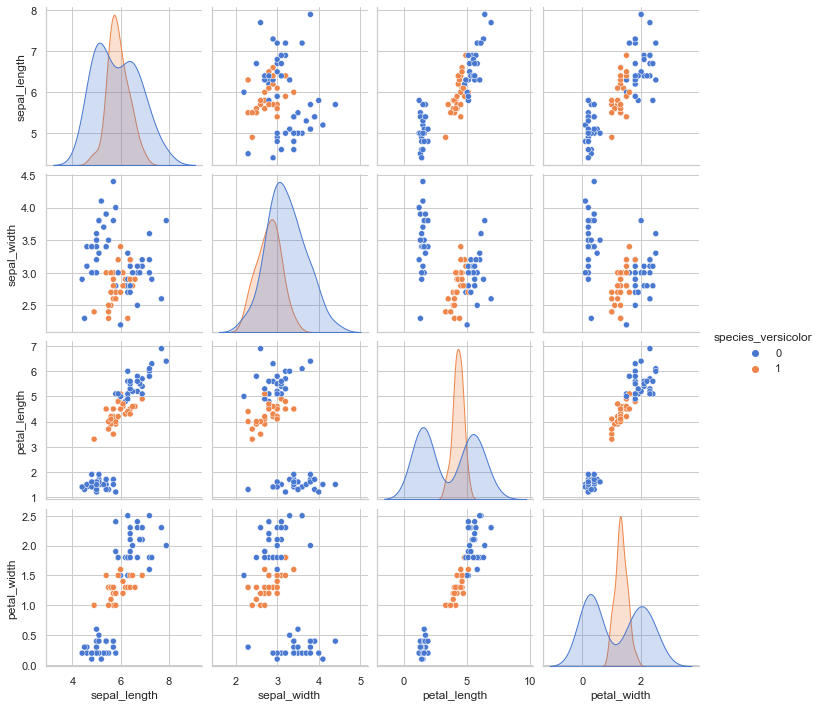

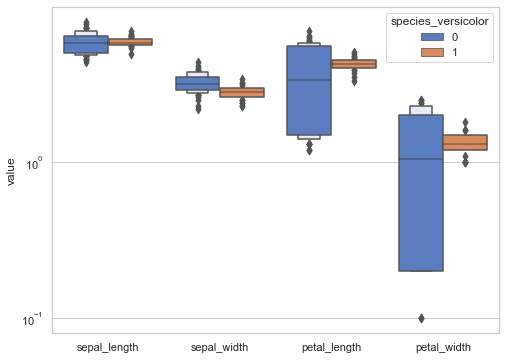

In [48]:
target = 'species_versicolor'

explore.explore_multivariate(train, target, cat_vars, quant_vars)

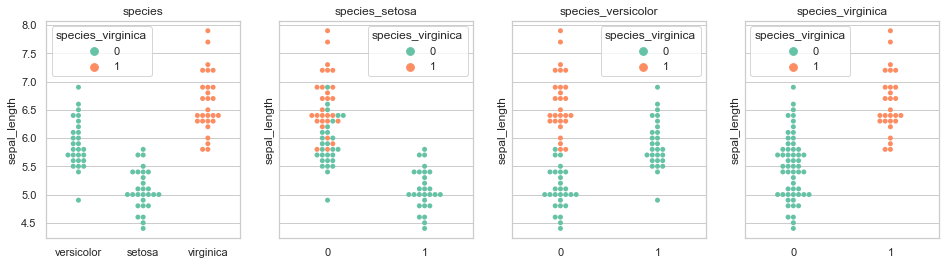

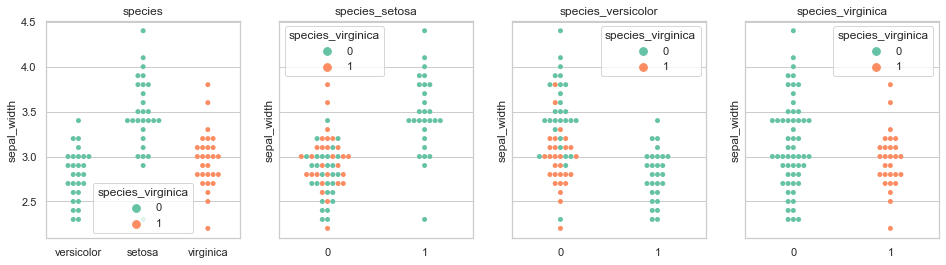

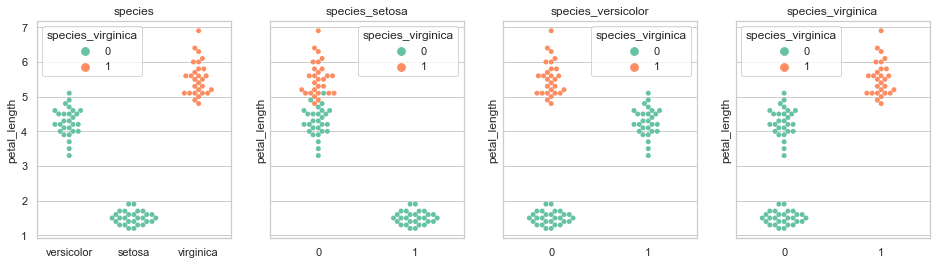

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


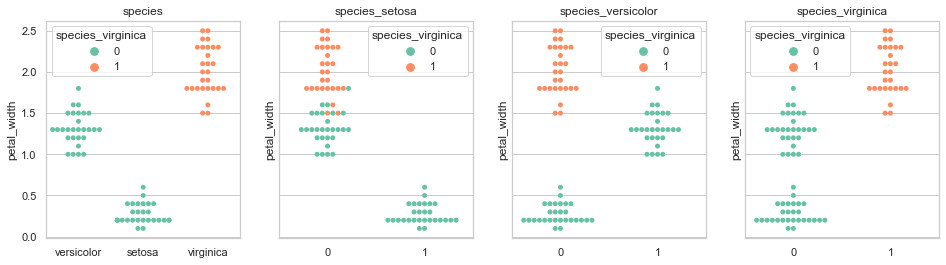

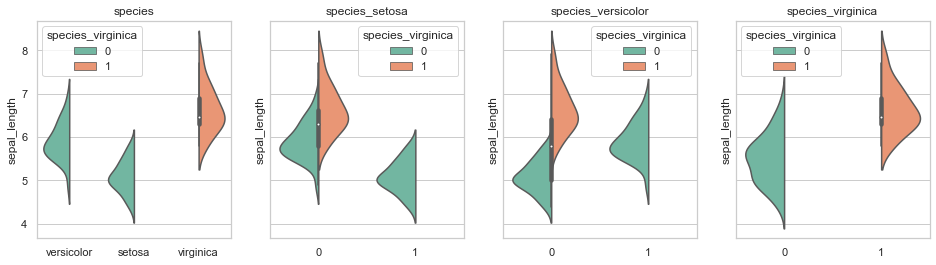

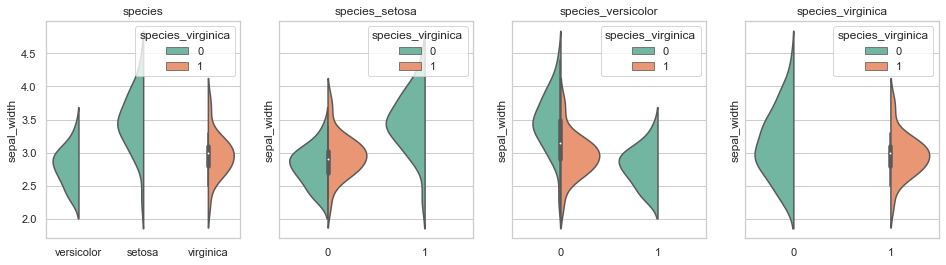

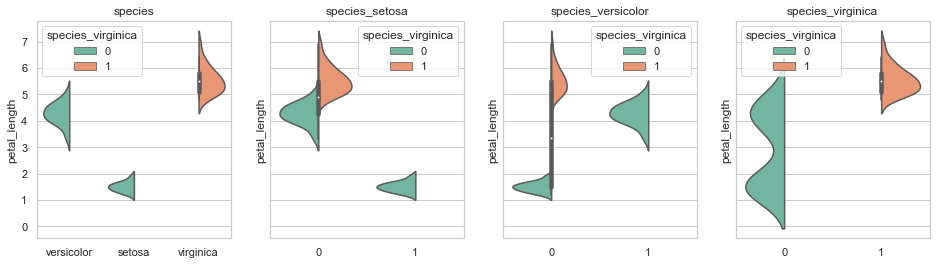

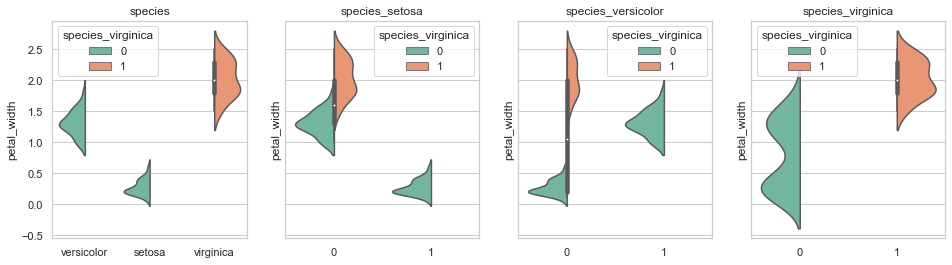

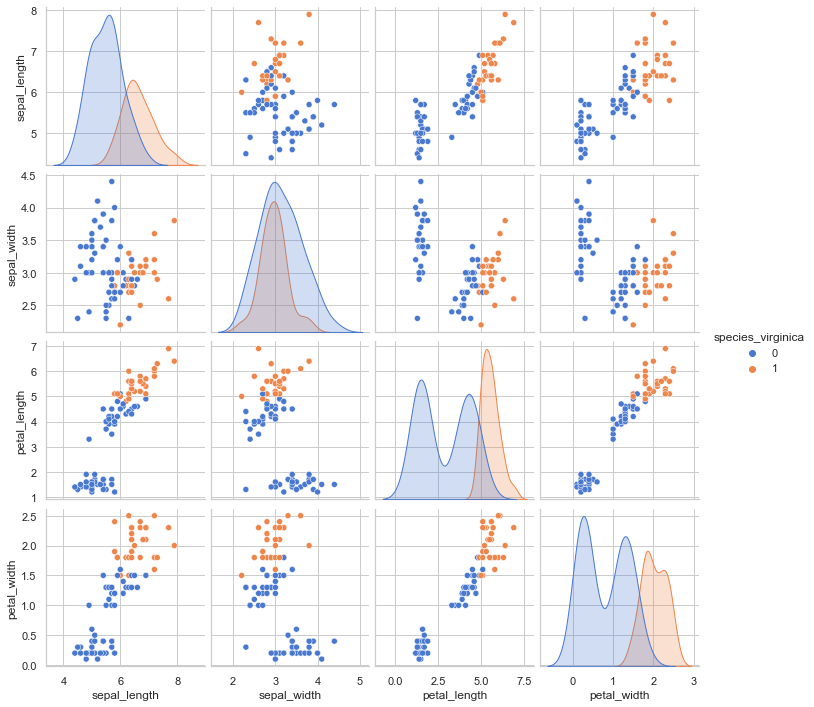

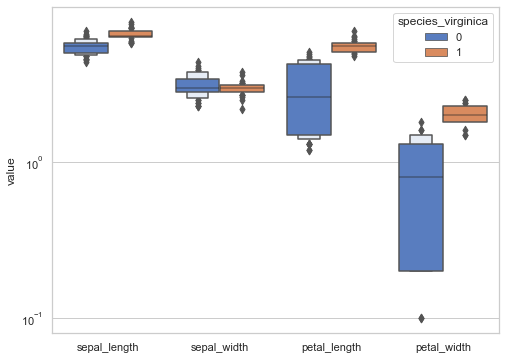

In [49]:
target = 'species_virginica'

explore.explore_multivariate(train, target, cat_vars, quant_vars)

In [64]:
#Takeaways & Actions to Take:

- Setosa has shortest sepal length and virginica has the longest
- Virginica and versicolor have similar sepal width
- Setosa has shortest petal length and virginica has the longest
- Setosa has the shortest petal width and virginica has the longest
- Petal length and petal width look to be linearly related. 

- Actions to take: Form a null hypothesis, alternative hypothesis to test the relationship between petal width and petal length and document the results.

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Datas

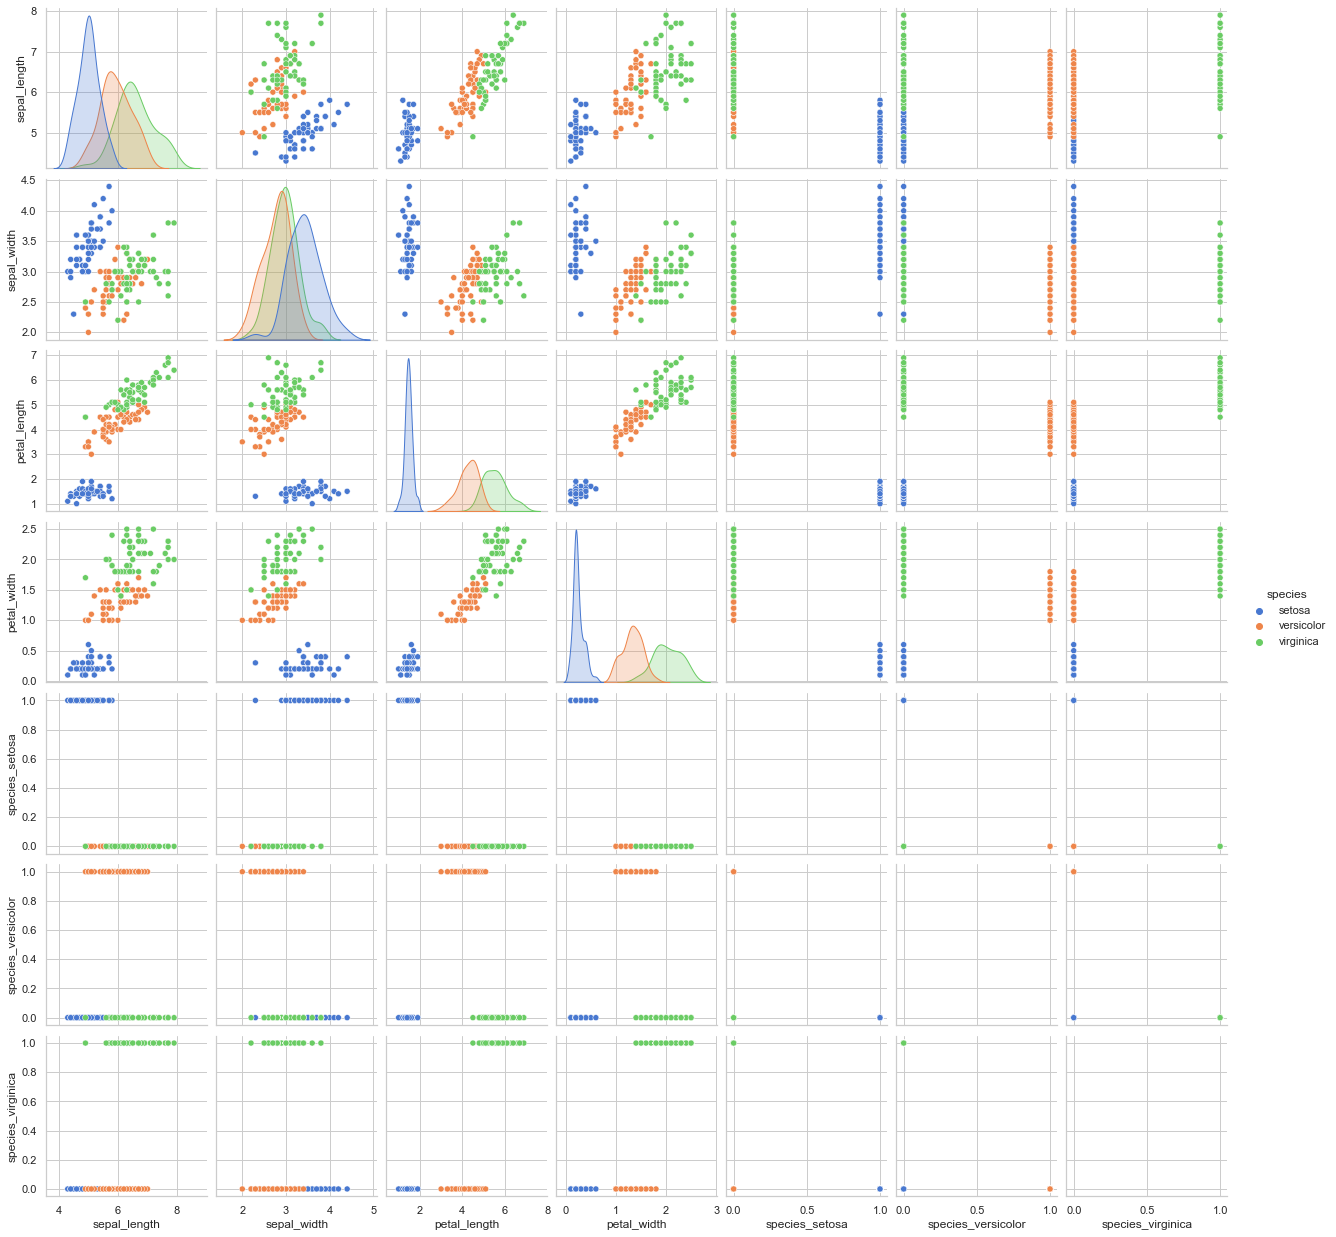

In [63]:
sns.pairplot(df, hue='species')
plt.show()